In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13124, done.
remote: Total 13124 (delta 0), reused 0 (delta 0), pack-reused 13124
Receiving objects: 100% (13124/13124), 11.99 MiB | 7.29 MiB/s, done.
Resolving deltas: 100% (9126/9126), done.


In [2]:
cd yolov5

/content/yolov5


In [3]:
pip install -r requirements.txt

     |████████████████████████████████| 596 kB 4.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
pip install wandb

     |████████████████████████████████| 1.8 MB 4.2 MB/s 
     |████████████████████████████████| 144 kB 83.9 MB/s 
     |████████████████████████████████| 181 kB 77.4 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=f5e29f70f5d820de168c56435c91d729d6a082b4b682fb89970b0cad20edd5b4
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import pandas as pd
import random
from PIL import Image, ImageDraw, ImageFont, ExifTags
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
from matplotlib.pyplot import figure
from shapely.geometry import Polygon
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import cv2
import os
import datetime
import torch
import torchvision

we have that the 
- coco : common objects in context, a way to do object detection using json sstructuure which determines how the labels are annotated
- pycocotools: helps doig the parsing ...

In [7]:
!git clone https://github.com/ZoRaFa/YOLOv5-TrainTest.git

Cloning into 'YOLOv5-TrainTest'...
remote: Enumerating objects: 872, done.
remote: Counting objects: 100% (501/501), done.
remote: Compressing objects: 100% (434/434), done.
remote: Total 872 (delta 44), reused 499 (delta 42), pack-reused 371
Receiving objects: 100% (872/872), 267.88 MiB | 12.00 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
cd /content/gdrive/MyDrive/YOLOv5-TrainTest-train-1/annotations-surfnet

/content/gdrive/MyDrive/YOLOv5-TrainTest-train-1/annotations-surfnet


## Load Data
### CSV Files from SharePoints (Images/BBOXES)

In [10]:
df_bboxes = pd.read_csv("bounding_boxes_202201241119.csv")
df_images = pd.read_csv("images_for_labelling_202201241120.csv")

In [11]:
df_images.head()

,id,id_creator_fk,createdon,filename,view,image_quality,context,container_url,blob_name
0,774ea7c1-e8ed-4fae-81fd-784c3ce87365,91f946b6-8871-4fbb-8c00-1b6794efb610,2021-05-19 08:56:51,04a90fd6-dbe8-4e35-bc8e-8bdea63bb77d.jpg,NaN,NaN,NaN,https://dataplasticoprod.blob.core.windows.net...,NaN
1,5ec8e4a4-d2e9-4d03-99ed-12e2744ca5ae,954dfaf0-cf84-4e5d-ad9d-0d0d6badb884,2021-05-27 12:15:17,img3316.jpg,side,good,river,NaN,NaN
2,4aa4b452-ce49-4578-a71b-39d99c305e59,954dfaf0-cf84-4e5d-ad9d-0d0d6badb884,2021-05-27 12:15:40,img630.jpg,above,good,river,NaN,NaN
3,ed5d193b-c897-4ebb-9d2d-e1583653923e,954dfaf0-cf84-4e5d-ad9d-0d0d6badb884,2021-05-27 12:14:53,img2387.jpg,side,good,river,NaN,NaN
4,f76656ed-bd4c-4672-b2c0-bc7ddaba2ba3,954dfaf0-cf84-4e5d-ad9d-0d0d6badb884,2021-05-27 12:14:59,img2611.jpg,side,medium,river,NaN,NaN


In [12]:
print(len(df_bboxes))
len(df_images)

8098


5371

I believe we have that there is the images; with different caracteristics, such as the type of view that there is, the nagle of the pic, the quality and the context - the water source/type 

Then there is the bonding box, each one is linked to an image ; and has 4 coordinates which determine sthe box. There is also the class ID : with the type of pollution detected (0) -10 

### Instances Files

In [13]:
coco_train = COCO(annotation_file = 'instances_train.json')
coco_valid = COCO(annotation_file = 'instances_val.json')

coco_images_train = coco_train.dataset['images'][1:]
coco_images_valid = coco_valid.dataset['images'][1:]

loading annotations into memory...
Done (t=0.81s)
creating index...
index created!
loading annotations into memory...
Done (t=0.75s)
creating index...
index created!


Here we have that the COCO loads the annotation file and prepare data structure

In [14]:
cd ..

/content/gdrive/MyDrive/YOLOv5-TrainTest-train-1


In [15]:
IMAGES_PATH = "images2label"
images      = os.listdir(IMAGES_PATH)
images_full_path = [os.path.join(IMAGES_PATH, x) for x in os.listdir(IMAGES_PATH)]

## Data Exploration

In [16]:
filenames = list(df_images.filename.unique())
len(filenames)
# here we're taking the files that are unique : so got rid of the doubles

5355

In [17]:
filenames_train = [obj['file_name'] for obj in coco_images_train]
filenames_valid = [obj['file_name'] for obj in coco_images_valid]
print("TRAIN", len(filenames_train), "VALID", len(filenames_valid))
filenames_train_valid = filenames_train + filenames_valid
print("TOTAL", len(filenames_train_valid))

#here we have the total train and validity is of 3921 and then the rest would be the one who 
#are on the csv file but not on the instances
# we have that we divided our images into 2 sets one for training and one for validation 

TRAIN 3529 VALID 392
TOTAL 3921


### Files included in CSV and Instances

In [18]:
files_inter = list(set(filenames) & set(filenames_train_valid))
len(files_inter)

3921

###Files that are CSV but not instances 

In [19]:
set_difference_f = set(filenames) - set(filenames_train_valid)
list_difference_f = list(set_difference_f)
len(list_difference_f)

1434

### Names of the files of the Instances that are not in CSV

In [20]:
set_difference_i = set(filenames_train_valid) - set(filenames)
list_difference_i = list(set_difference_i)
len(list_difference_i)

0

### GroupBy ID

In [34]:
df_bboxes['id_ref_trash_type_fk'].value_counts()/len(df_bboxes)

1     0.466041
3     0.155224
10    0.150901
9     0.077056
6     0.075327
4     0.023463
8     0.022351
2     0.015065
5     0.007656
7     0.006915
Name: id_ref_trash_type_fk, dtype: float64

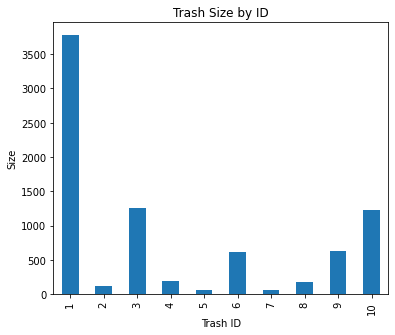

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
dfg = df_bboxes.groupby(['id_ref_trash_type_fk']).size()
dfg.plot(kind='bar', title='Trash Size by ID', ylabel='Size',
         xlabel='Trash ID', figsize=(6, 5))

the data is unbalanced - way more of categpry 1 : sheet, tarp, plastic bags and fragment 
- Sheet / tarp / plastic bag / fragment
- Insulating material
- Bottle-shaped
- Can-shaped
- Drum
- Other packaging
- Tire
- Fishing net / cord
- Easily namable
- Unclear

### GroupBy Context

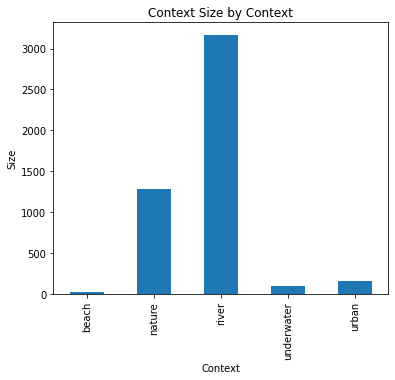

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
dfg = df_images.groupby(['context']).size()
dfg.plot(kind='bar', title='Context Size by Context', ylabel='Size',
         xlabel='Context', figsize=(6, 5))

The data is unbalanced : once again much more of the river then others ; small beach

### GroupBy View

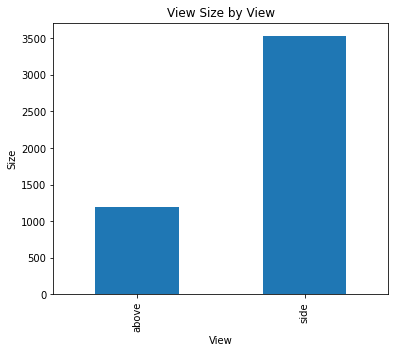

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
dfg = df_images.groupby(['view']).size()
dfg.plot(kind='bar', title='View Size by View', ylabel='Size',
         xlabel='View', figsize=(6, 5))

### GroupBy Image quality

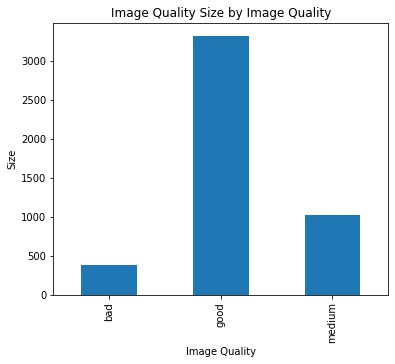

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
dfg = df_images.groupby(['image_quality']).size()
dfg.plot(kind='bar', title='Image Quality Size by Image Quality', ylabel='Size',
         xlabel='Image Quality', figsize=(6, 5))

## Data Processing

In [25]:
def coco2yolo(bbox, image_height=1080, image_width=1080):
    """
    coco  => [x1, y1, w, h]
    yolo  => [xmid, ymid, w, h] (normalized)
    """
    
    bbox = bbox.copy().astype(float) # otherwise all value will be 0 as voc_pascal dtype is np.int

    bbox[[0, 2]] = bbox[[0, 2]]/ image_width
    bbox[[1, 3]] = bbox[[1, 3]]/ image_height
    
    bbox[[0, 1]] = bbox[[0, 1]] + bbox[[2, 3]]/2
    
    return bbox

#I belive we are normalizing the pictures such that we can use it in the yolo format 

In [26]:
def plot_image_and_bboxes(img, anns, ratio):
    fig, ax = plt.subplots(1, figsize=(12, 10))
    ax.imshow(img)
    
    for ann in anns:
        
        [bbox_x, bbox_y, bbox_w, bbox_h] = (ratio*np.array(ann['bbox'])).astype(int)
        rect = patches.Rectangle((bbox_x, bbox_y), bbox_w, bbox_h, linewidth=2, edgecolor='r', facecolor="none")
        ax.add_patch(rect)
    
    plt.show()

In [ ]:
!mkdir ./images
!mkdir ./labels

mkdir: cannot create directory ‘./images’: File exists
mkdir: cannot create directory ‘./labels’: File exists


### Get Categories

In [27]:
annotation_file = "annotations-surfnet/instances_train.json"
coco = COCO(annotation_file)

coco_categories = coco.dataset['categories'][1:]
class_id_to_name_mapping = {}
for c in coco_categories:
    class_id_to_name_mapping[c['id']-1] = c['name']

class_id_to_name_mapping

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


{0: 'Sheet / tarp / plastic bag / fragment',
 1: 'Insulating material',
 2: 'Bottle-shaped',
 3: 'Can-shaped',
 4: 'Drum',
 5: 'Other packaging',
 6: 'Tire',
 7: 'Fishing net / cord',
 8: 'Easily namable',
 9: 'Unclear'}

### Creation of 2 DataFrames for future manipulation 5GrouppKFold, KFold, Split)

In [ ]:
data_dir = "images2label"

def get_df_train_val(annotation_file):
    
    coco = COCO(annotation_file) #transform the file 

    old_filenames  = []
    dates          = []
    views          = []
    images_quality = []
    contexts       = []
    all_bboxes     = []
    all_images     = []
    new_filenames  = []
    new_labelnames = []

    img_ids = np.array(coco.getImgIds())
    
    for img_id in img_ids:
        image_infos = coco.loadImgs(ids=[img_id])[0]

        if os.path.exists(os.path.join(data_dir, image_infos['file_name'])):

            date_creation  = df_images.loc[df_images["filename"] == image_infos["file_name"]]["createdon"].values[0]
            view           = df_images.loc[df_images["filename"] == image_infos["file_name"]]["view"].values[0]
            image_quality  = df_images.loc[df_images["filename"] == image_infos["file_name"]]["image_quality"].values[0]
            context        = df_images.loc[df_images["filename"] == image_infos["file_name"]]["context"].values[0]

            date_time_obj = datetime.datetime.strptime(date_creation, '%Y-%m-%d %H:%M:%S')

            old_filenames.append(image_infos["file_name"])
            dates.append(date_time_obj)
            views.append(view)
            images_quality.append(image_quality)
            contexts.append(context)

            image = Image.open(os.path.join(data_dir,image_infos['file_name']))
            try:
                for orientation in ExifTags.TAGS.keys():
                    if ExifTags.TAGS[orientation]=='Orientation':
                        break
                exif = image._getexif()
                if exif is not None:
                    if exif[orientation] == 3:
                        image=image.rotate(180, expand=True)
                    elif exif[orientation] == 6:
                        image=image.rotate(270, expand=True)
                    elif exif[orientation] == 8:
                        image=image.rotate(90, expand=True)

            except (AttributeError, KeyError, IndexError):
                # cases: image don't have getexif
                pass

            image    = np.array(image) #cv2.cvtColor(np.array(image.convert('RGB')),  cv2.COLOR_RGB2BGR)
            ann_ids  = coco.getAnnIds(imgIds=[img_id])
            anns     = coco.loadAnns(ids=ann_ids)
            h, w     = image.shape[:-1]
            target_h = 1080
            ratio    = target_h/h
            target_w = int(ratio*w) 
            image    = cv2.resize(image,(target_w,target_h))
            h, w     = image.shape[:-1]
            yolo_annot = []
            for ann in anns:
                cat = ann['category_id'] - 1
                [bbox_x, bbox_y, bbox_w, bbox_h] = (ratio*np.array(ann['bbox'])).astype(int)
                bbox = np.array([bbox_x, bbox_y, bbox_w, bbox_h])
                yolo_bbox = coco2yolo(bbox, target_h, target_w)
                yolo_str  = str(cat) + " " + " ".join(yolo_bbox.astype(str))
                yolo_annot.append(yolo_str)
            
            basename  = os.path.splitext(image_infos['file_name'])[0]
            file_name = str(image_infos['id']) + "-" + basename

            img_file_name   = os.path.join("./images", file_name) + ".jpg"
            label_file_name = os.path.join("./labels", file_name) + ".txt"
            
            # Save Label
            with open(label_file_name, 'w') as f:
                f.write('\n'.join(yolo_annot))

            img_to_save = Image.fromarray(image)
            # Save image
            img_to_save.save(img_file_name)

            all_bboxes.append(yolo_annot)
            new_filenames.append(img_file_name)
            new_labelnames.append(label_file_name)
            all_images.append(img_to_save)
            
    my_list = list(zip(old_filenames, dates, views, images_quality, contexts, new_filenames, new_labelnames, all_images, all_bboxes))
    my_df   = pd.DataFrame(my_list, columns=['old_path', 'date', 'view', 'quality','context', 'img_name', 'label_name', 'img', 'bboxes'])
    
    return my_df

df_train = get_df_train_val("annotations-surfnet/instances_train.json")
df_valid = get_df_train_val("annotations-surfnet/instances_val.json")

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

#code to see if using the GPU ; helps for the error cuda but only until 50 epochs

Mon May  2 08:07:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Group DataFRames for future manipulation

In [ ]:
print(len(df_train))
print(len(df_valid))

2514
289


In [ ]:
frames = [df_train, df_valid]
df_train_valid = pd.concat(frames)

df_train_valid.head()

,old_path,date,view,quality,context,img_name,label_name,img,bboxes
0,img(4).jpeg,2021-05-27 12:14:16,side,good,river,./images/0-img(4).jpg,./labels/0-img(4).txt,<PIL.Image.Image image mode=RGB size=810x1080 ...,[0 0.031481481481481485 0.4703703703703704 0.0...
1,5b677166-1751-49db-bcfa-a330f27db2c9(15).jpg,2021-09-03 15:39:28,above,good,nature,./images/1-5b677166-1751-49db-bcfa-a330f27db2c...,./labels/1-5b677166-1751-49db-bcfa-a330f27db2c...,<PIL.Image.Image image mode=RGB size=809x1080 ...,[0 0.5358467243510507 0.3412037037037037 0.082...
2,img(186).jpeg,2021-05-27 12:14:15,side,good,river,./images/2-img(186).jpg,./labels/2-img(186).txt,<PIL.Image.Image image mode=RGB size=1439x1080...,[2 0.56636553161918 0.5680555555555556 0.14315...
3,img79.jpg,2021-05-27 12:15:44,above,good,river,./images/3-img79.jpg,./labels/3-img79.txt,<PIL.Image.Image image mode=RGB size=631x1080 ...,[8 0.45879556259904913 0.45925925925925926 0.1...
4,cbb9fc4d-06a8-49f9-bd0b-dad10f5b5cd2(1).jpg,2021-10-10 17:31:56,side,good,nature,./images/4-cbb9fc4d-06a8-49f9-bd0b-dad10f5b5cd...,./labels/4-cbb9fc4d-06a8-49f9-bd0b-dad10f5b5cd...,<PIL.Image.Image image mode=RGB size=626x1080 ...,[9 0.6493610223642172 0.32314814814814813 0.67...


In [ ]:
d = df_train_valid.iloc[0]["date"]
def get_day(d):
    d = d.date()
    return int("".join(str(d).split("-")))

df_train_valid["day"] = df_train_valid["date"].apply(lambda x: get_day(x))
df_train_valid.head()

,old_path,date,view,quality,context,img_name,label_name,img,bboxes,day
0,img(4).jpeg,2021-05-27 12:14:16,side,good,river,./images/0-img(4).jpg,./labels/0-img(4).txt,<PIL.Image.Image image mode=RGB size=810x1080 ...,[0 0.031481481481481485 0.4703703703703704 0.0...,20210527
1,5b677166-1751-49db-bcfa-a330f27db2c9(15).jpg,2021-09-03 15:39:28,above,good,nature,./images/1-5b677166-1751-49db-bcfa-a330f27db2c...,./labels/1-5b677166-1751-49db-bcfa-a330f27db2c...,<PIL.Image.Image image mode=RGB size=809x1080 ...,[0 0.5358467243510507 0.3412037037037037 0.082...,20210903
2,img(186).jpeg,2021-05-27 12:14:15,side,good,river,./images/2-img(186).jpg,./labels/2-img(186).txt,<PIL.Image.Image image mode=RGB size=1439x1080...,[2 0.56636553161918 0.5680555555555556 0.14315...,20210527
3,img79.jpg,2021-05-27 12:15:44,above,good,river,./images/3-img79.jpg,./labels/3-img79.txt,<PIL.Image.Image image mode=RGB size=631x1080 ...,[8 0.45879556259904913 0.45925925925925926 0.1...,20210527
4,cbb9fc4d-06a8-49f9-bd0b-dad10f5b5cd2(1).jpg,2021-10-10 17:31:56,side,good,nature,./images/4-cbb9fc4d-06a8-49f9-bd0b-dad10f5b5cd...,./labels/4-cbb9fc4d-06a8-49f9-bd0b-dad10f5b5cd...,<PIL.Image.Image image mode=RGB size=626x1080 ...,[9 0.6493610223642172 0.32314814814814813 0.67...,20211010


In [ ]:
print(len(df_train_valid))

2803


### Simple Kfold
Cross-validation, evaluate the model on data sample 
k : nb of groups the data splits into ; 
- it shuffles the data; splits it into k groups ; one of them becomes the test and the others become the train sets. We fit the model on the training sets
- we use the mean as a test metric

k is usually 5 or 10

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=7)
df_train_valid = df_train_valid.reset_index(drop=True)
df_train_valid['fold'] = -1

for fold, (train_idx, val_idx) in enumerate(kf.split(df_train_valid)):
    df_train_valid.loc[val_idx, 'fold'] = fold

display(df_train_valid.fold.value_counts())

0    401
1    401
2    401
3    400
4    400
5    400
6    400
Name: fold, dtype: int64

In [ ]:
FOLD = 1

train_files = []
val_files   = []
train_df = df_train_valid.query("fold!=@FOLD")
valid_df = df_train_valid.query("fold==@FOLD")

train_files = list(train_df["img_name"].unique())
val_files   = list(valid_df["img_name"].unique())
len(train_files), len(val_files)

(2402, 401)

In [ ]:
print("Train", 100 * len(train_files)/(len(train_files)+len(val_files)))
print("Valid", 100 * len(val_files)/(len(train_files)+len(val_files)))

Train 85.69389939350695
Valid 14.306100606493043


In [ ]:
def plot_image_an_bboxes_yolo(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)), outline="#ff8300", width=5)
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.figure(figsize = (12,10))
    plt.imshow(np.array(image))
    plt.show()

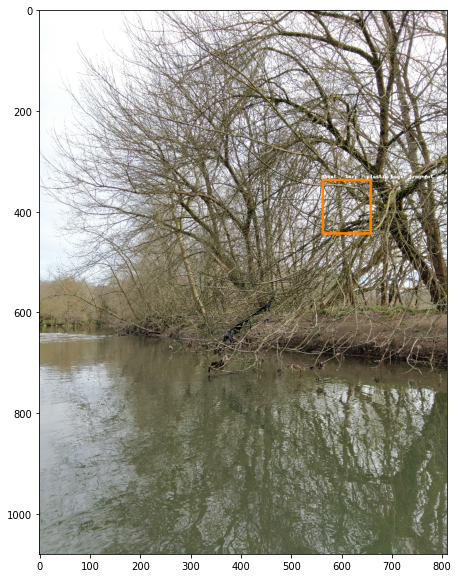

In [ ]:
row        = df_train_valid.iloc[282]
img_name   = os.path.join("images-surfnet/images2label", row["old_path"])
img        = row["img"]
label_list = row["bboxes"]
label_list = [x.split(" ") for x in label_list]
label_list = [[float(y) for y in x ] for x in label_list]

plot_image_an_bboxes_yolo(img, label_list)

## Training

In [ ]:
import yaml

cwd = './'

with open(os.path.join( cwd , 'train.txt'), 'w') as f:
    for path in train_files:
        f.write(path+'\n')
            
with open(os.path.join(cwd , 'val.txt'), 'w') as f:
    for path in val_files:
        f.write(path+'\n')

data = dict(
    path  = './../',
    train =  os.path.join( cwd , 'train.txt') ,
    val   =  os.path.join( cwd , 'val.txt' ),
    nc    = 10,
    names = ['Sheet / tarp / plastic bag / fragment', 'Insulating material', 'Bottle-shaped', 'Can-shaped', 'Drum', 'Other packaging', 'Tire', 'Fishing net / cord', 'Easily namable', 'Unclear'],
    )

with open(os.path.join( cwd , 'data.yaml'), 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)

f = open(os.path.join( cwd , 'data.yaml'), 'r')
print('\nyaml:')
print(f.read())


yaml:
names:
- Sheet / tarp / plastic bag / fragment
- Insulating material
- Bottle-shaped
- Can-shaped
- Drum
- Other packaging
- Tire
- Fishing net / cord
- Easily namable
- Unclear
nc: 10
path: ./../
train: ./train.txt
val: ./val.txt



In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%%writefile yolov5/data/hyps/hyp.scratch.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# Hyperparameters for COCO training from scratch
# python train.py --batch 40 --cfg yolov5m.yaml --weights '' --data coco.yaml --img 640 --epochs 300
# See tutorials for hyperparameter evolution https://github.com/ultralytics/yolov5#tutorials

lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.1  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.5  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 1.0  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.012  # image HSV-Hue augmentation (fraction)
hsv_s: 0.6  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.3  # image HSV-Value augmentation (fraction)
degrees: 2.0  # image rotation (+/- deg)
translate: 0.3  # image translation (+/- fraction)
scale: 0.25  # image scale (+/- gain)
shear: 0.0  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.1  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 0.7  # image mosaic (probability)
mixup: 0.0  # image mixup (probability)
copy_paste: 0.0  # segment copy-paste (probability)

Overwriting yolov5/data/hyps/hyp.scratch.yaml


A model trained with higher resolution images can have better results for detecting small objects

In [ ]:
!python "yolov5/train.py" --img 640 --hyp "yolov5/data/hyps/hyp.scratch.yaml" --batch 32 --epochs 30 --data "data.yaml" --weights "yolov5s.pt" --workers 23 --project "ben" --name "yolo_ben_30_I&L" --exist-ok 

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=yolov5/data/hyps/hyp.scratch.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=23, project=ben, name=yolo_ben_30_I&L, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
YOLOv5 🚀 v6.1-146-gb804b36 torch 1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_de

In [ ]:
ls

sample_data/


In [ ]:
!python "yolov5/train.py" --img 640 --hyp "yolov5/data/hyps/hyp.scratch.yaml" --batch 20 --epochs 30 --data "data.yaml" --weights "yolov5s.pt" --workers 23 --project "ben" --name "yolo_ben_1" --exist-ok 

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=yolov5/data/hyps/hyp.scratch.yaml, epochs=30, batch_size=20, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=23, project=ben, name=yolo_ben_1, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
YOLOv5 🚀 v6.1-146-gb804b36 torch 1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

remote: Enumerating objects: 58, done.
remote: Counting objects: 1

In [ ]:
!python "yolov5/train.py" --img 640 --hyp "yolov5/data/hyps/hyp.scratch.yaml" --batch 64 --epochs 100 --data "data.yaml" --weights "yolov5s.pt" --workers 23 --project "ben" --name "yolo_ben_100" --exist-ok --device 0

python3: can't open file 'yolov5/train.py': [Errno 2] No such file or directory


In [ ]:
!python "yolov5/train.py" --img 640 --hyp "yolov5/data/hyps/hyp.scratch.yaml" --batch 32 --epochs 50 --data "data.yaml" --weights "yolov5s.pt" --workers 23 --project "ben" --name "yolo_ben_2" --exist-ok  --device 0

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) Traceback (most recent call last):
  File "/content/gdrive/MyDrive/YOLOv5-TrainTest-train-1/yolov5/utils/loggers/__init__.py", line 28, in <module>
    wandb_login_success = wandb.login(timeout=30)
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_login.py", line 76, in login
    configured = _login(**kwargs)
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_login.py", line 282, in _login
    wlogin.prompt_api_key()
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_login.py", line 210, in prompt_api_key
    key, status = self._prompt_api_key()
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_login.py", line 194, in _prompt_api_key
    no_create=self._settings.force if self._settings else None,
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/lib/apikey.py", line 92, in prom

add smthg to device ; une des variables pas dans le GPU 

In [ ]:
!python "yolov5/train.py" --img 640 --hyp "yolov5/data/hyps/hyp.scratch.yaml" --batch 32 --epochs 10 0 --data "data.yaml" --weights "yolov5s.pt" --workers 23 -

/content/gdrive/MyDrive/YOLOv5-TrainTest-train-1
